<a href="https://colab.research.google.com/github/MaDhuManodya/Colab/blob/main/bananatrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Nov 12 15:49:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 16.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image, clear_output

# Clear output to reset the display
clear_output()

# Run YOLO check mode
!yolo mode=check


# Initialize a YOLOv8 model
model = YOLO("yolov8n.pt")  # Replace with the specific model if needed

# Display model information
model.info()

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 905, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are {'val', 'predict', 'train', 'benchmark', 'track', 'export'}.

    Arguments received: ['yolo', 'mode=check']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'classify', 'pose', 'obb', 'detect'}
                MODE (required) is one of {'val', 'predict', 'train', 'benchmark', 'track', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with

100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wwHJ522BSP0PWIvcvEHI")
project = rf.workspace("madu").project("puwalu-banana")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to puwalu-banana-1 in yolov8:: 100%|██████████| 2297/2297 [00:00<00:00, 6917.93it/s]


In [ ]:
!yolo train model=yolov8n.pt data=/content/puwalu-banana-1/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/puwalu-banana-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

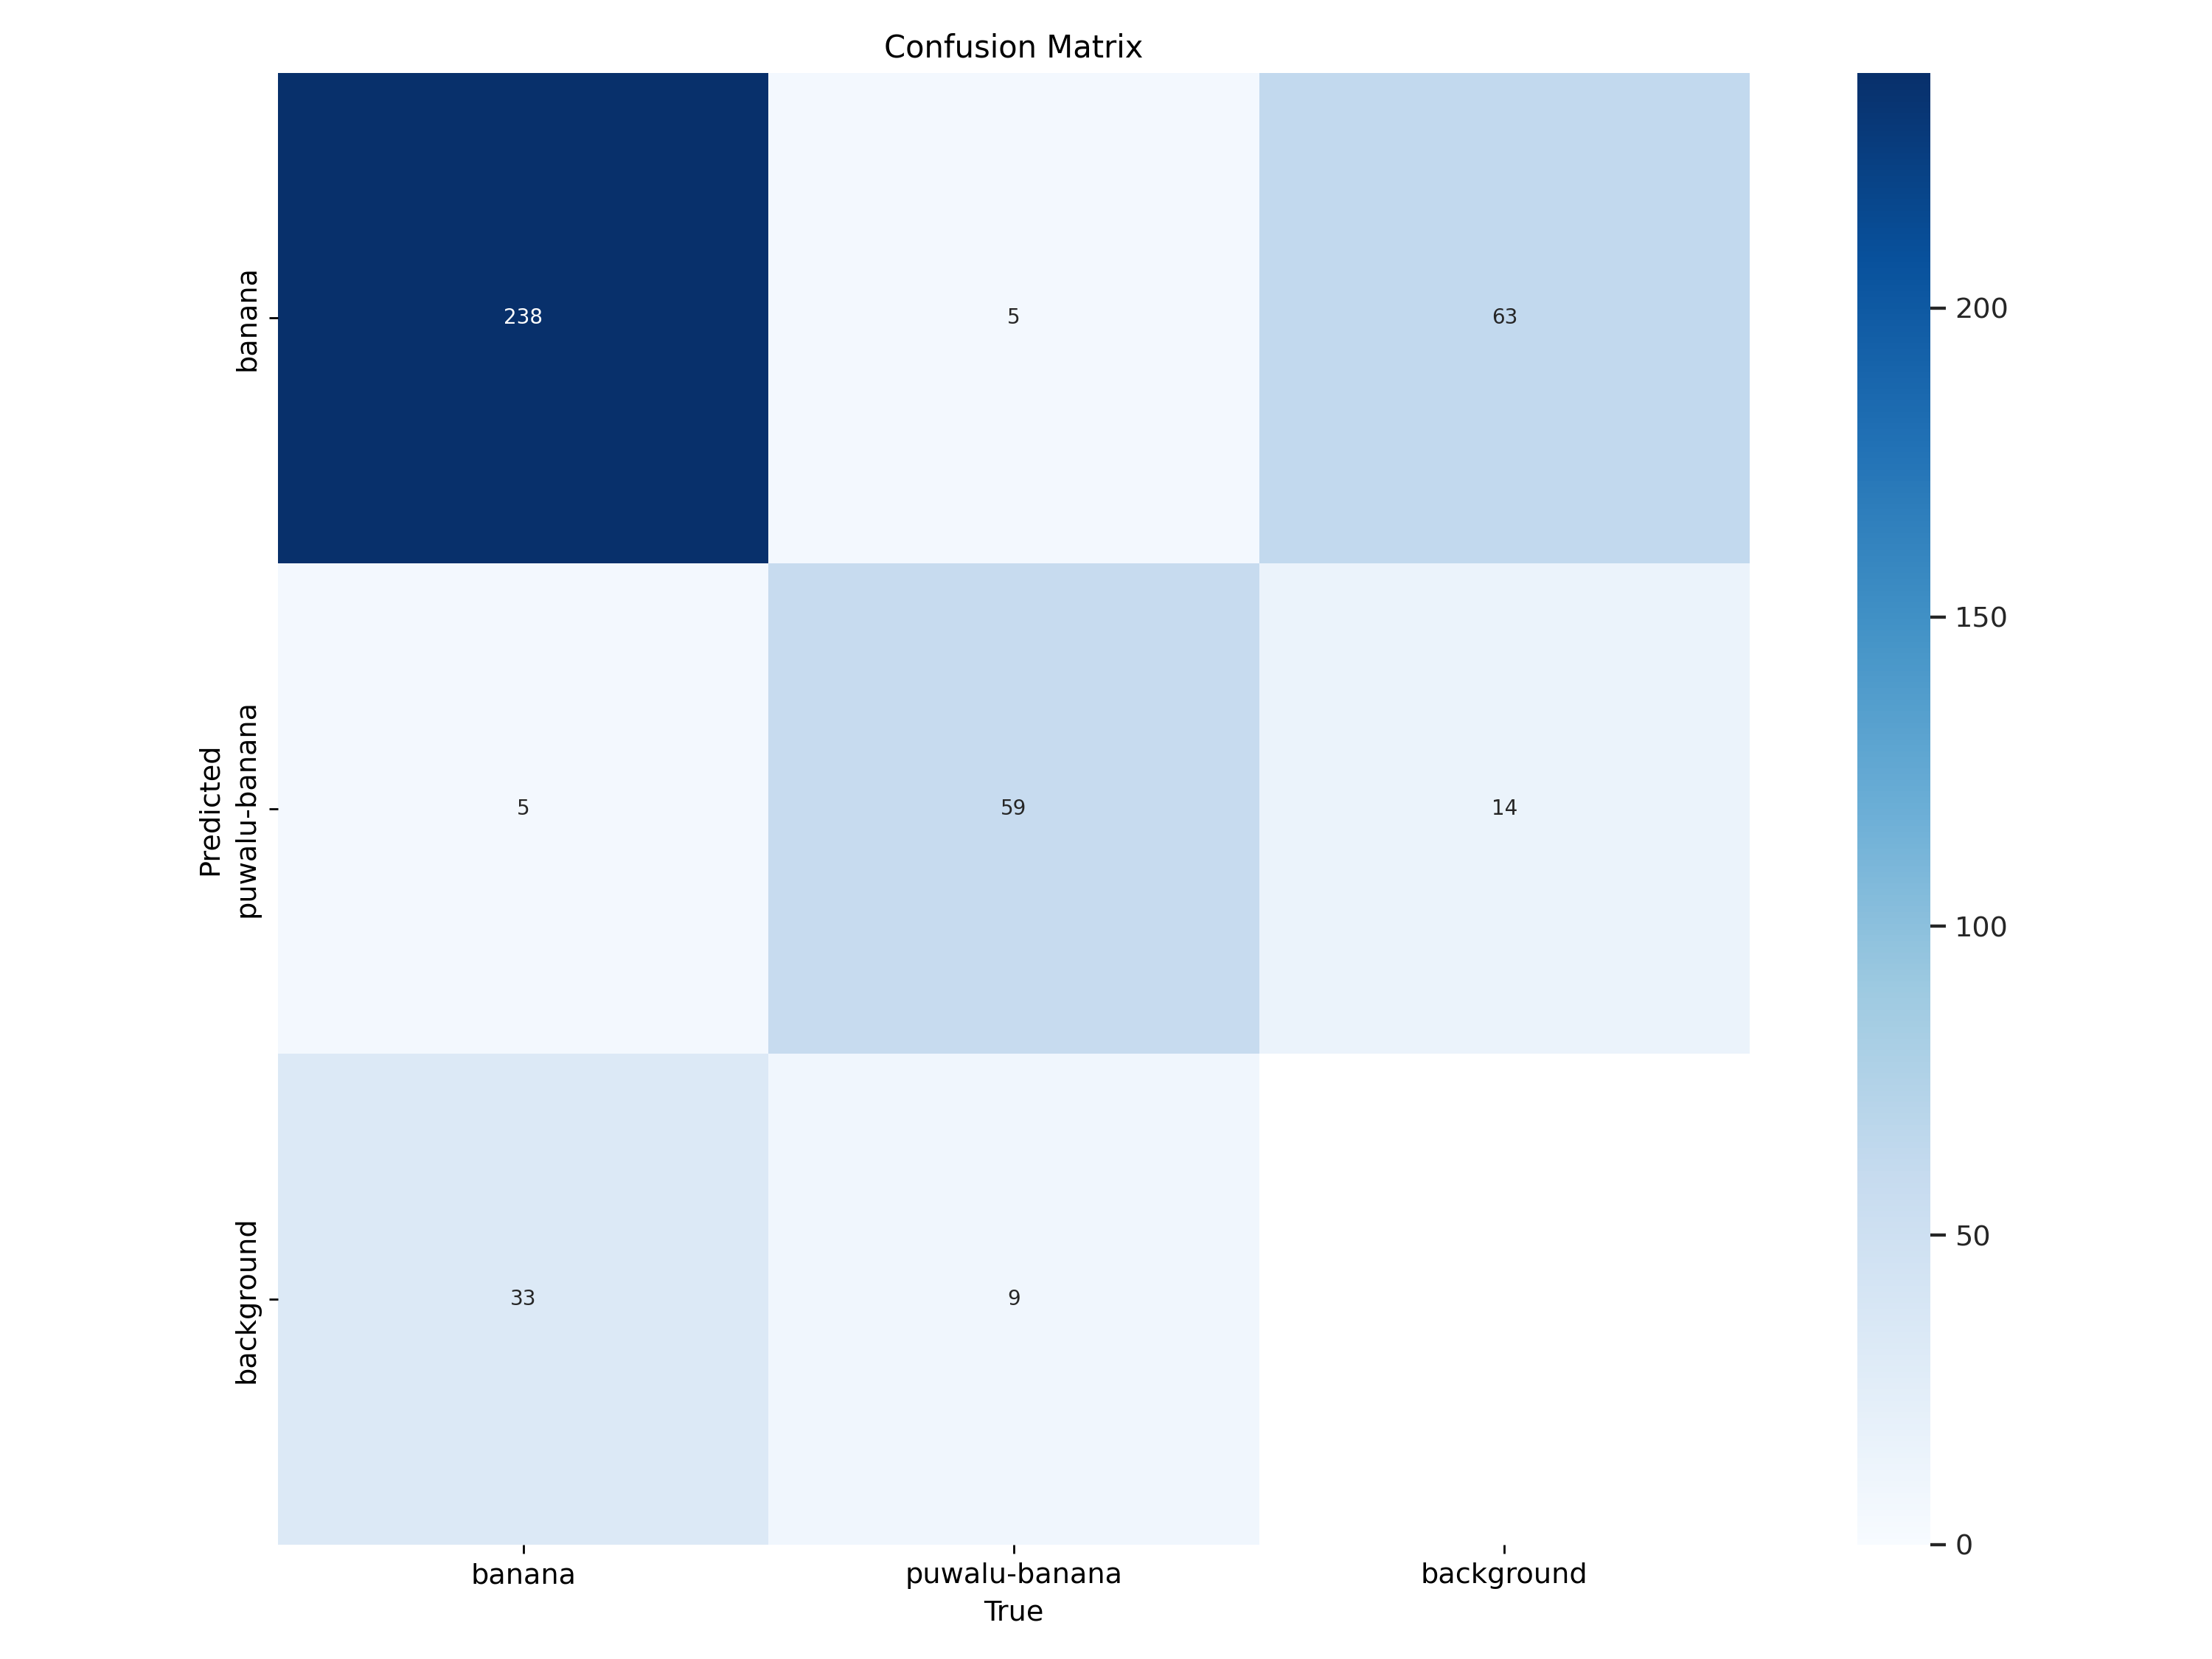

In [ ]:
Image (filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

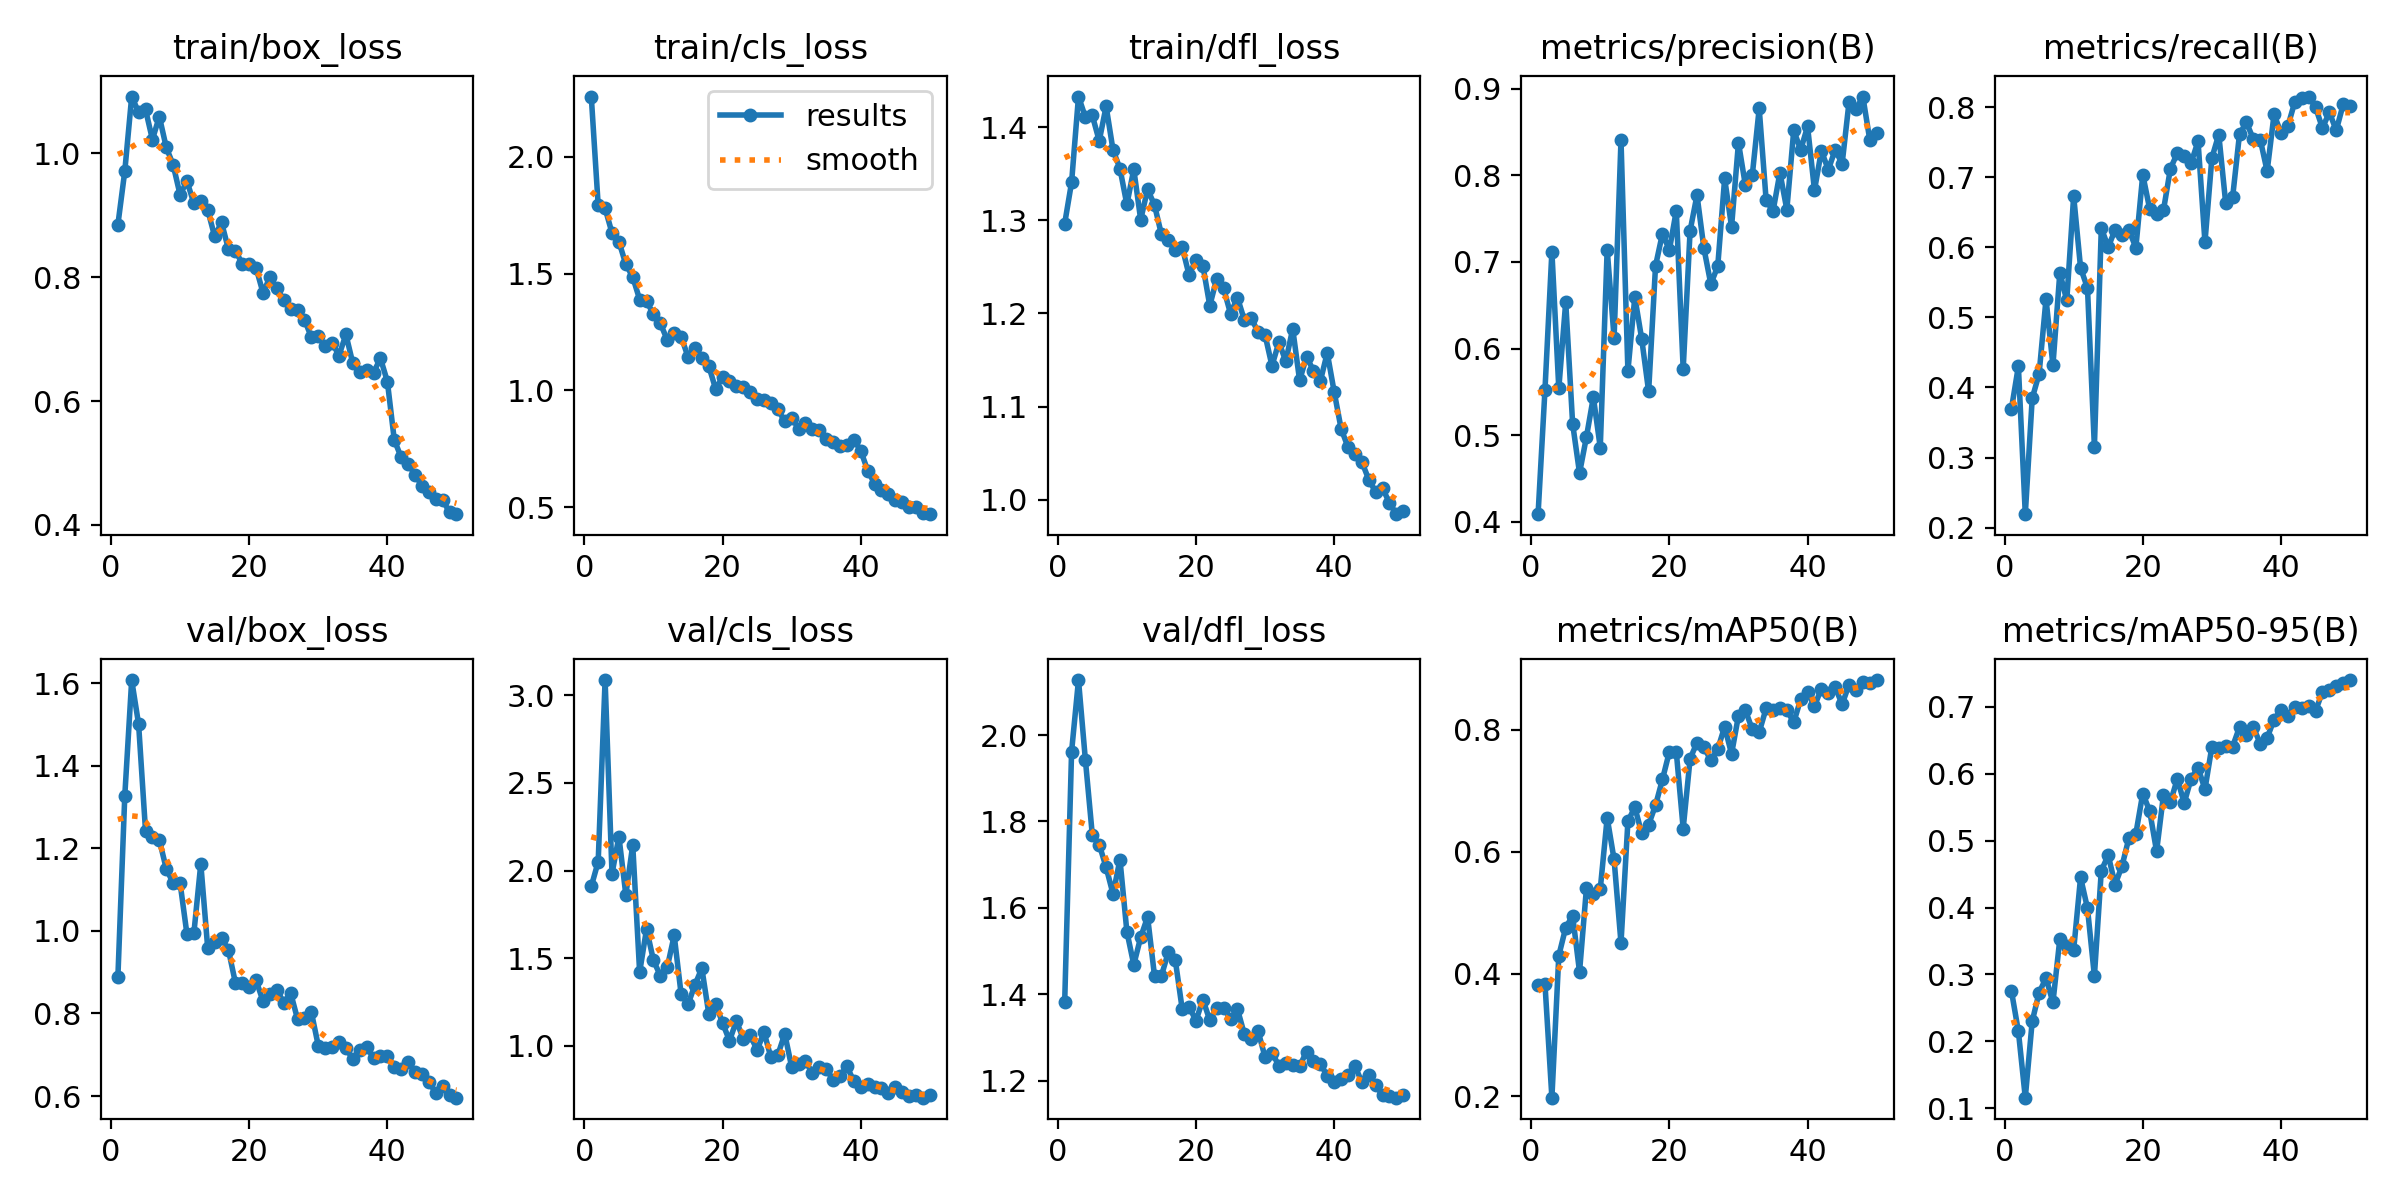

In [ ]:
Image (filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/puwalu-banana-1/test/images

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/114 /content/puwalu-banana-1/test/images/IMG_2179_jpg.rf.60926801c4854aa90c6b5a366fa7de45.jpg: 640x640 1 puwalu-banana, 10.2ms
image 2/114 /content/puwalu-banana-1/test/images/IMG_2183_jpg.rf.a6879b906569019c7f0edeaee3fa7ce8.jpg: 640x640 1 puwalu-banana, 9.3ms
image 3/114 /content/puwalu-banana-1/test/images/IMG_2215_jpg.rf.d8ca86ad273a8651720ac0286345c74f.jpg: 640x640 1 puwalu-banana, 7.3ms
image 4/114 /content/puwalu-banana-1/test/images/IMG_2228_jpg.rf.4845b0060cc914f111d7e46175bd90df.jpg: 640x640 1 puwalu-banana, 7.3ms
image 5/114 /content/puwalu-banana-1/test/images/IMG_2232_jpg.rf.636080fc0d1762ba13acfd1bbd69be4e.jpg: 640x640 1 puwalu-banana, 7.3ms
image 6/114 /content/puwalu-banana-1/test/images/IMG_2259_jpg.rf.34107c83377ec0614947af92edbdff91.jpg: 640x640 1 banana, 7.3ms
image 7/114 /content/puwalu-banana-1/t

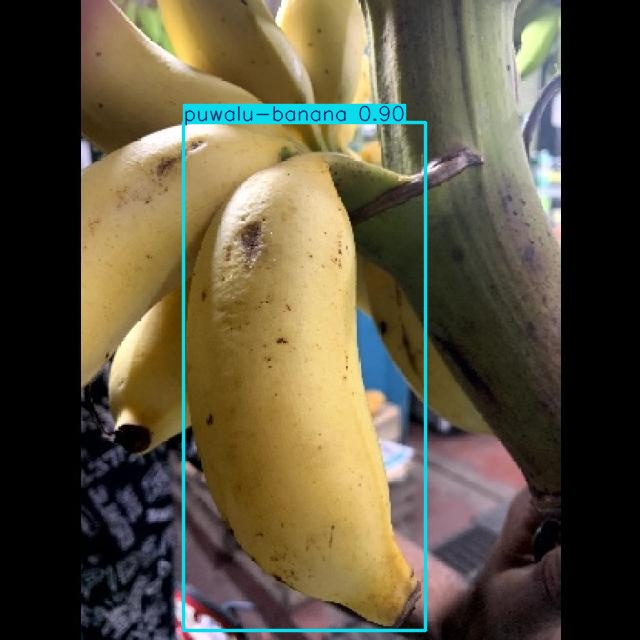

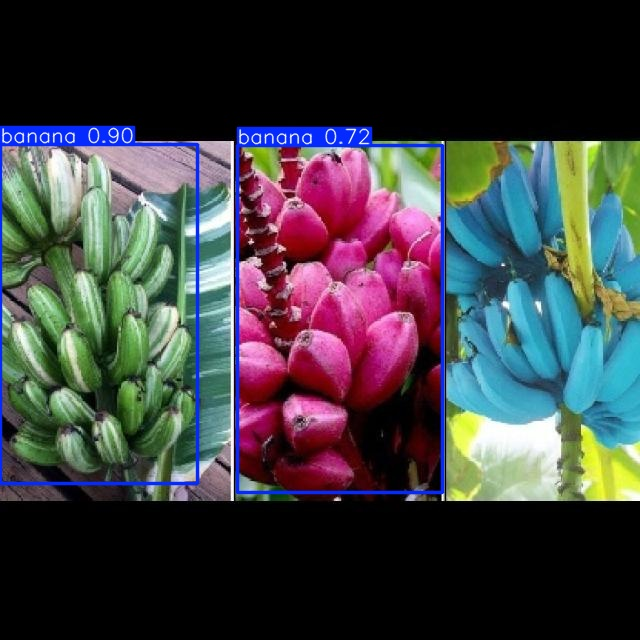

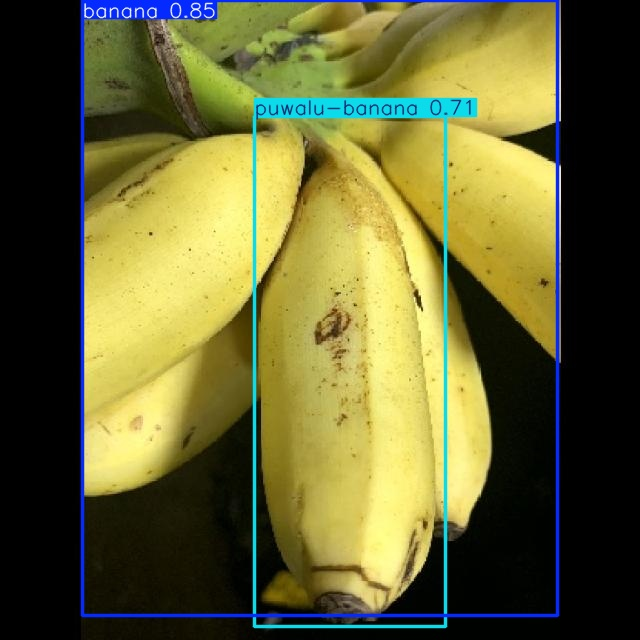

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))

In [ ]:
from google.colab import files

# Compress and download
!zip -r yolo_training_files.zip runs/detect/train
files.download("yolo_training_files.zip")
